# Gaussian Mixture Density Network

In [9]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from GaussianMixtureDensityNetwork import GaussianMixtureDensityNetwork

## Data

Size of features in training data: (37500L, 1L)
Size of output in training data: (37500L,)
Size of features in test data: (12500L, 1L)
Size of output in test data: (12500L,)


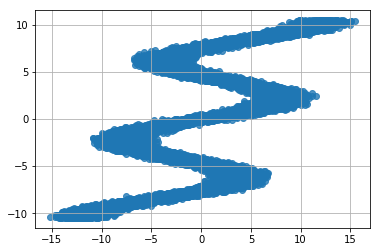

In [36]:
def build_toy_dataset(N):
  y_data = np.random.uniform(-10.5, 10.5, N)
  r_data = np.random.normal(size=N)  # random noise
  x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
  x_data = x_data.reshape((N, 1))
  return train_test_split(x_data, y_data, random_state=42)

N = 50000  # number of data points

X_train, X_test, y_train, y_test = build_toy_dataset(N)
print("Size of features in training data: {}".format(X_train.shape))
print("Size of output in training data: {}".format(y_train.shape))
print("Size of features in test data: {}".format(X_test.shape))
print("Size of output in test data: {}".format(y_test.shape))
sns.regplot(X_train, y_train, fit_reg=False)
plt.grid()
plt.show()

## Model

In [37]:
net = GaussianMixtureDensityNetwork(input_dim=1, output_dim=1, num_distributions=20, num_hidden_layers=3, num_hidden_units=64)

In [38]:
net.fit(X_train, y_train)

GaussianMixtureDensityNetwork.py:138: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  nb_epoch = epoch, validation_split = validation_split, callbacks = callbacks)


Train on 33750 samples, validate on 3750 samples
Epoch 1/200
33750/33750 [==============================] - 2s 73us/step - loss: 7.6580 - val_loss: 5.9239
Epoch 2/200
33750/33750 [==============================] - 2s 72us/step - loss: 5.2991 - val_loss: 4.7829
Epoch 3/200
33750/33750 [==============================] - 2s 71us/step - loss: 4.4454 - val_loss: 4.1888
Epoch 4/200
33750/33750 [==============================] - 2s 69us/step - loss: 4.0090 - val_loss: 3.8164
Epoch 5/200
33750/33750 [==============================] - 2s 69us/step - loss: 3.7560 - val_loss: 3.6280
Epoch 6/200
33750/33750 [==============================] - 2s 69us/step - loss: 3.6268 - val_loss: 3.5111
Epoch 7/200
33750/33750 [==============================] - 2s 72us/step - loss: 3.5545 - val_loss: 3.4458
Epoch 8/200
33750/33750 [==============================] - 2s 68us/step - loss: 3.4982 - val_loss: 3.4005
Epoch 9/200
33750/33750 [==============================] - 2s 70us/step - loss: 3.4572 - val_loss: 3.33

33750/33750 [==============================] - 2s 70us/step - loss: 2.5476 - val_loss: 2.6105
Epoch 78/200
33750/33750 [==============================] - 2s 72us/step - loss: 2.5517 - val_loss: 2.6359
Epoch 79/200
33750/33750 [==============================] - 2s 71us/step - loss: 2.5501 - val_loss: 2.5438
Epoch 80/200
33750/33750 [==============================] - 2s 70us/step - loss: 2.5379 - val_loss: 2.5598
Epoch 81/200
33750/33750 [==============================] - 2s 71us/step - loss: 2.5350 - val_loss: 2.5625
Epoch 82/200
33750/33750 [==============================] - 2s 73us/step - loss: 2.5285 - val_loss: 2.5722
Epoch 83/200
33750/33750 [==============================] - 2s 72us/step - loss: 2.5226 - val_loss: 2.5171
Epoch 84/200
33750/33750 [==============================] - 2s 70us/step - loss: 2.5123 - val_loss: 2.6506
Epoch 85/200
33750/33750 [==============================] - 2s 71us/step - loss: 2.5303 - val_loss: 2.4922
Epoch 86/200
33750/33750 [========================

33750/33750 [==============================] - 3s 81us/step - loss: 2.3113 - val_loss: 2.0356
Epoch 154/200
33750/33750 [==============================] - 2s 70us/step - loss: 2.3003 - val_loss: 2.0705
Epoch 155/200
33750/33750 [==============================] - 2s 72us/step - loss: 2.2802 - val_loss: 2.0418
Epoch 156/200
33750/33750 [==============================] - 3s 75us/step - loss: 2.2882 - val_loss: 2.0160
Epoch 157/200
33750/33750 [==============================] - 2s 74us/step - loss: 2.3006 - val_loss: 2.0196
Epoch 158/200
33750/33750 [==============================] - 2s 71us/step - loss: 2.2850 - val_loss: 2.0225
Epoch 159/200
33750/33750 [==============================] - 2s 72us/step - loss: 2.2830 - val_loss: 2.0174
Epoch 160/200
33750/33750 [==============================] - 2s 73us/step - loss: 2.2841 - val_loss: 2.0312
Epoch 161/200
33750/33750 [==============================] - 2s 71us/step - loss: 2.2707 - val_loss: 2.0064
Epoch 162/200
33750/33750 [===============

In [52]:
# y_pred = np.zeros((X_test.shape[0],1))
y_pred = None
y_pred = net.predict(X_test,y_pred)
for i in range(10):
    y_pred = net.predict(X_test,y_pred)

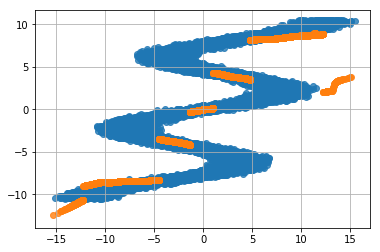

In [53]:
sns.regplot(X_train, y_train, fit_reg = False)
sns.regplot(X_test, y_pred, fit_reg = False)
plt.grid()
plt.show()

In [41]:
y = np.arange(-10, 10, 0.2)
x = np.arange(-15, 15, 0.2)
logp = np.zeros((len(x),len(y)))
for i in range(len(x)):
    logp[len(x)-i-1,:] = np.clip(net.predict_log_proba(x[i], y), -10, +10)

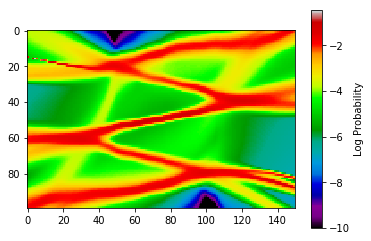

In [51]:
plt.imshow(logp.T)
plt.set_cmap('nipy_spectral')
cb = plt.colorbar()
cb.set_label('Log Probability')